# Importing necessary libraries

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df1 = pd.read_csv('New_Releases_Whiskey_Data.csv')
df2 = pd.read_csv('Top_1000_Whiskey_Data.csv')

### Checking out DF1 and DF2

In [4]:
df1.head()

,Unnamed: 0,price,rating,url,user,whiskey
0,0,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,benfolt,1770-glasgow-single-malt
1,1,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,Tommib,1770-glasgow-single-malt
2,2,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,ekonshin,1770-glasgow-single-malt
3,3,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,MisterED,1770-glasgow-single-malt
4,4,"€ 50,88",86,https://www.whiskybase.com/whiskies/whisky/128...,whiskyleaksulm,1770-glasgow-single-malt


In [5]:
len(df1)

7431

In [6]:
df2.head()

,Unnamed: 0,price,rating,url,user,whiskey
0,0,"€ 40500,00",100,https://www.whiskybase.com/whiskies/whisky/244...,Udovitsa Andrey,laphroaig-1967-rwd
1,1,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,Alonzo,laphroaig-1967-rwd
2,2,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,whiskycuse,laphroaig-1967-rwd
3,3,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,Nopax,laphroaig-1967-rwd
4,4,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,WhiskyJug,laphroaig-1967-rwd


In [7]:
len(df2)

40657

In [8]:
#Consolidating the Dataframes and dropping the unnamed:0 column
df = pd.concat([df1, df2], axis=0)
df.drop(columns = 'Unnamed: 0', inplace = True)

In [9]:
df.head()

,price,rating,url,user,whiskey
0,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,benfolt,1770-glasgow-single-malt
1,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,Tommib,1770-glasgow-single-malt
2,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,ekonshin,1770-glasgow-single-malt
3,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,MisterED,1770-glasgow-single-malt
4,"€ 50,88",86,https://www.whiskybase.com/whiskies/whisky/128...,whiskyleaksulm,1770-glasgow-single-malt


In [10]:
len(df)

48088

# To make our recommendation more accurate, we only want to include users who have reviewed more than 5 whiskeys

In [11]:
df5 = df.groupby('user').filter(lambda x: len(x)>5)

In [12]:
#df5.user.value_counts()

In [13]:
len(df5.user)

42647

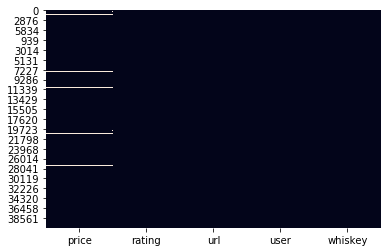

In [14]:
# Checking for empty columns
sns.heatmap(df5.isnull(), cbar=False)

In [15]:
df5.dropna(inplace=True)

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
len(df5.user.value_counts())

1223

# Creating a group_id column to maintain user name privacy

In [17]:
df5['User_ID'] = df5.groupby('user').grouper.group_info[0]

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df5['Whiskey_ID'] = df5.groupby('whiskey').grouper.group_info[0]

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df5.tail()

,price,rating,url,whiskey,User_ID,Whiskey_ID
40652,"€ 185,00",92,https://www.whiskybase.com/whiskies/whisky/133...,macallan-1973-mm,124,776
40653,"€ 185,00",92,https://www.whiskybase.com/whiskies/whisky/133...,macallan-1973-mm,9,776
40654,"€ 185,00",92,https://www.whiskybase.com/whiskies/whisky/133...,macallan-1973-mm,463,776
40655,"€ 185,00",91,https://www.whiskybase.com/whiskies/whisky/133...,macallan-1973-mm,1150,776
40656,"€ 185,00",91,https://www.whiskybase.com/whiskies/whisky/133...,macallan-1973-mm,205,776


# Testing to see if a specific user has a consistent ID

In [18]:
df5[df5.user=='Yuxan'].head()

,price,rating,url,user,whiskey,User_ID
44,"€ 40500,00",95,https://www.whiskybase.com/whiskies/whisky/244...,Yuxan,laphroaig-1967-rwd,808
290,"€ 8999,00",99,https://www.whiskybase.com/whiskies/whisky/232...,Yuxan,laphroaig-1970-rwd,808
344,"€ 6373,75",98,https://www.whiskybase.com/whiskies/whisky/926...,Yuxan,springbank-100-proof,808
551,"€ 4616,93",96,https://www.whiskybase.com/whiskies/whisky/251...,Yuxan,glenfarclas-1958-sv,808
583,"€ 2440,00",98,https://www.whiskybase.com/whiskies/whisky/176...,Yuxan,caol-ila-1968-rwd,808


In [19]:
df5.User_ID.describe()

count    41157.000000
mean       563.068931
std        345.489910
min          0.000000
25%        268.000000
50%        548.000000
75%        852.000000
max       1222.000000
Name: User_ID, dtype: float64

In [20]:
# Dropping Usernames after getting the unique user_ids
df5.drop(columns=['user'], inplace=True)

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
df5.head()

,price,rating,url,whiskey,User_ID
0,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,852
3,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,459
4,"€ 50,88",86,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,1205
5,"€ 50,88",85,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,547
7,"€ 50,88",84,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,562


# Since we merged 2 different lists together, we believe there might be some overlap. So dropping duplicates to ensure we get rid of any overlap

In [22]:
df5.drop_duplicates(inplace=True)

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
# Dropped 139 rows of data
df5.describe()

,rating,User_ID
count,41018.000000,41018.000000
mean,92.900556,562.449388
std,3.277837,345.370426
min,2.000000,0.000000
25%,92.000000,268.000000
50%,93.000000,548.000000
75%,95.000000,851.000000
max,100.000000,1222.000000


In [25]:
df5[df5['User_ID'] == 100].head()

,price,rating,url,whiskey,User_ID
406,"€ 6373,75",96,https://www.whiskybase.com/whiskies/whisky/926...,springbank-100-proof,100
730,"€ 8223,65",98,https://www.whiskybase.com/whiskies/whisky/330...,bowmore-1964,100
831,"€ 1501,00",98,https://www.whiskybase.com/whiskies/whisky/345...,glenlivet-1955-rwd,100
1040,"€ 13566,38",94,https://www.whiskybase.com/whiskies/whisky/729...,bowmore-1956,100
1425,"€ 13510,94",94,https://www.whiskybase.com/whiskies/whisky/931...,bowmore-1956,100


In [30]:
df5['price(euro)'] = df5['price'].str.replace(',','.').str[2:].astype(float)

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df5['price(dollar)'] = round(df5['price(euro)'] * 1.12, 2)

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df5 = df5.drop('price', axis=1)

In [33]:
df5.head()

,rating,url,whiskey,User_ID,Whiskey_ID,price(euro),price(dollar)
0,88,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,852,0,50.88,56.99
3,87,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,459,0,50.88,56.99
4,86,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,1205,0,50.88,56.99
5,85,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,547,0,50.88,56.99
7,84,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,562,0,50.88,56.99


# Moving final dataframe to csv to begin making the Model

In [34]:
df5.to_csv('final_whiskey_data.csv')